## Marketing Analysis and understanding the marketing data for the store. It will look at Exploratory Data Analysis of Marketing



In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('marketing_data.csv', sep=',')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## Data Cleansing: 
### Income column renaming, removing outliers and null values

In [5]:
df[' Income '] = df[' Income '].str.replace('$','').str.replace(',','').astype('float')

In [6]:
df[' Income '].head()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name:  Income , dtype: float64

In [10]:
df[' Income '].head()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name:  Income , dtype: float64

In [11]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
 Income                float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

In [12]:
df.rename(columns={' Income ':'Income'},inplace=True)

In [14]:
df['Income'].head()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64

In [15]:
#checking if there are null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [17]:
#as the column Income has null values we will replace the null values with the mean
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [18]:
#now we don't have columns null values

df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

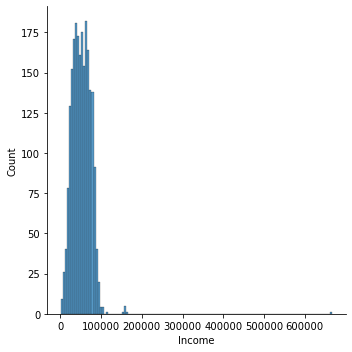

In [22]:
#now we check the distribution of some data starting with Income
sns.displot(df['Income'])

<AxesSubplot:ylabel='Income'>

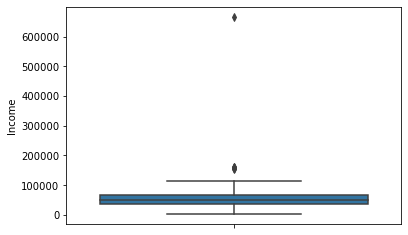

In [26]:
#we can see that in the Income we have outliers and it is the salary higher than 200000 so we need to take it out

sns.boxplot(y=df['Income'])

In [27]:
df = df.drop(df[df['Income'] >200000].index)

<AxesSubplot:ylabel='Income'>

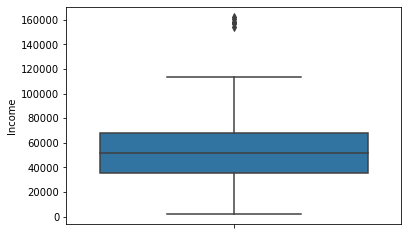

In [28]:
sns.boxplot(y=df['Income'])

In [29]:
#there are some outliers for the date of birth

df = df.drop(df[df['Year_Birth'] <=1900].index)

<AxesSubplot:ylabel='Year_Birth'>

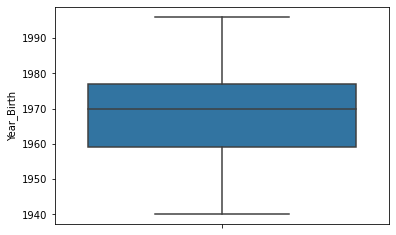

In [30]:
sns.boxplot(y=df['Year_Birth'])

In [31]:
#we can notice that date customer is an object, it needs to be transformed to a datetime object

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

In [32]:
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])

In [34]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

In [35]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


### From this section we implement some marketing analysis

<AxesSubplot:>

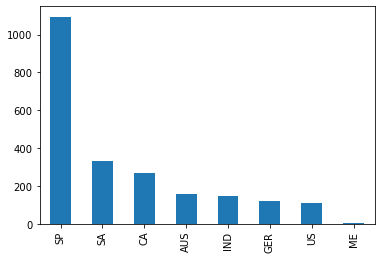

In [38]:
## We can see Spain is the main country as clients in the shop
df['Country'].value_counts(ascending=False).plot(kind='bar')

Text(0.5, 1.0, 'Amount of responses by country')

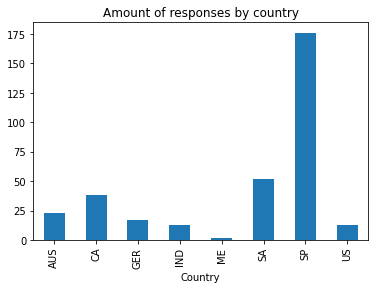

In [60]:
#we can see from the chart below that Spain is the country responding better than the other countries
#to the last camapign
df.groupby('Country')['Response'].sum().plot(kind='bar')
plt.title('Amount of responses by country')

In [62]:
#Now we create a new column where we add the total of the amount spent

df['TotalAmountSpent'] = df.iloc[:,9:15].sum(axis=1)

In [63]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalAmountSpent
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,91


In [68]:
#now we create a new column with the total of purchases from the different channels(web, catalogue, instore, deals)

df['Total_Num_Purchases'] = df.iloc[:, 15:19].sum(axis=1)

In [70]:
#we check with head() the 2 columns created at the far right of the dataframe
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalAmountSpent,Total_Num_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,1,0,SP,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,CA,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,US,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,0,AUS,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,1,0,SP,91,8


<AxesSubplot:xlabel='Income', ylabel='TotalAmountSpent'>

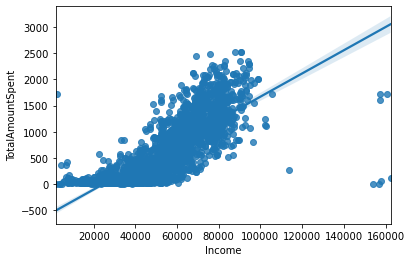

In [71]:
#now we are trying to see if there is any correlation, first between income and total amount spent

sns.regplot(x='Income', y='TotalAmountSpent', data=df)

In [77]:
#from the scatter chart above and the corr value below (0.78) we can see that there is correlation between
#income and total amount spent
df['Income'].corr(df['TotalAmountSpent'])

0.7892919948976488

In [81]:
#we can see now for example if who has kids at home is more prone to get deals, we need to create a new variable
#call dependants that adds the kidhome and tenhome columns

df['Dependants'] = df.iloc[:,5:7].sum(axis=1)

<AxesSubplot:xlabel='Dependants', ylabel='NumDealsPurchases'>

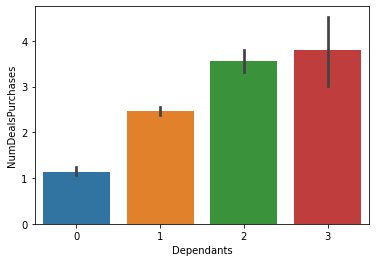

In [83]:
#now let's check with a barplot if who has kids at home is more prone to buy wit deals

sns.barplot(x='Dependants', y='NumDealsPurchases', data=df)

Text(0.5, 0, 'N° of kids at home')

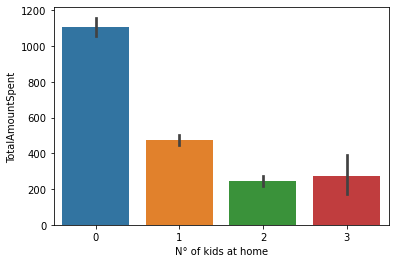

In [85]:
#now we can check if who has kids at home spent less or more than who hasnt
#who has no kids at home spent more than who has
sns.barplot(x='Dependants', y='TotalAmountSpent', data=df)
plt.xlabel('N° of kids at home')


Text(0.5, 1.0, 'Number of deals by countries')

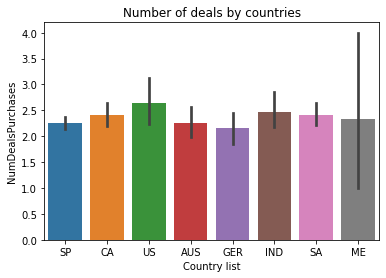

In [87]:
#we could check which country used more deals
#US used more deals

sns.barplot(x='Country', y='NumDealsPurchases', data=df)
plt.xlabel('Country list')
plt.title('Number of deals by countries')


### We are going to compare the campaigns prior and last, the last campaign is in the column Response

In [102]:
#the last campaign wasn't very effective
((df['Response'].value_counts(normalize=True)) * 100)
#let's have a look in percentage

0    85.062612
1    14.937388
Name: Response, dtype: float64

In [104]:
#we create a new table previous campaigns so we can compare with the last campaign (Response)
df['prev_campaigns'] = df.iloc[:, 20:25].sum(axis=1)

In [109]:
#we see now the effectiveness of the previous campaigns

df['prev_campaigns'].value_counts()

0    1774
1     324
2      83
3      44
4      11
Name: prev_campaigns, dtype: int64

In [121]:
#to compare previous campaigns with the latest campaign we create a new dataframe, with rows as the acceptedcmp 
#and Response. We use mean and the percentage

campaign_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

In [122]:
#we can easily see that the last campaign was the most successfull. We can also have a better look visualizing it with 
#a chart.See next code cell

campaign_success

,index,Percent
0,AcceptedCmp1,6.440072
1,AcceptedCmp2,1.341682
2,AcceptedCmp3,7.289803
3,AcceptedCmp4,7.468694
4,AcceptedCmp5,7.245081
5,Response,14.937388


## The last campaign was the most successfull 

Text(0, 0.5, 'Campaigns')

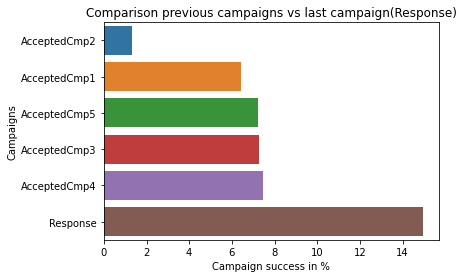

In [128]:
#visualize the different campaigns vs latest (reminder: last campaign column is labelled Response)
sns.barplot(x='Percent', y='index', data=campaign_success.sort_values('Percent'))

plt.title('Comparison previous campaigns vs last campaign(Response)')
plt.xlabel('Campaign success in %')
plt.ylabel('Campaigns')